<a href="https://colab.research.google.com/github/akhila-attem/Self-projects/blob/main/Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
#Importing the data
path="/content/test_val.xlsx"
data=pd.read_excel(path)
data

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
# delete the column 'Locations'
del data['id']
data

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
129877,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
129878,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
#Checking for Null values
data.isna().sum();

In [ ]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer_Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type_of_Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight_Distance                    129880 non-null  int64  
 6   Inflight_wifi_service              129880 non-null  int64  
 7   Departure_Arrival_time_convenient  129880 non-null  int64  
 8   Ease_of_Online_booking             129880 non-null  int64  
 9   Gate_location                      129880 non-null  int64  
 10  Food_and_drink                     129880 non-null  int64  
 11  Online_boarding                    1298

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique());

['Female' 'Male']
['Loyal Customer' 'disloyal Customer']
[52 36 20 44 49 16 77 43 47 46 33 60 50 31 55 25 30 62 24 22 51 56 41 53
 12 39 32 40 42 28 59 58 27 67 70 66 19 69 35 54 26 61 21 37 45 38  7 34
 17 15 48 13 11 29  8 18 23 65 57 80 64  9 14 68 10 79 63 73 74 71 72 76
 78 75 85]
['Business travel' 'Personal Travel']
['Eco' 'Business' 'Eco Plus']
[ 160 2863  192 ...  974 1479  400]
[5 1 2 0 3 4]
[4 1 0 3 5 2]
[3 2 0 4 5 1]
[4 1 2 3 5 0]
[3 5 2 4 1 0]
[4 2 1 5 3 0]
[3 5 2 4 1 0]
[5 4 2 1 3 0]
[5 4 1 2 3 0]
[5 4 1 2 3 0]
[5 4 3 1 2]
[2 3 4 1 5 0]
[5 4 2 1 3 0]
[5 2 4 3 1 0]
[  50    0   77    1   28   29   18  117   10    5    2    8   21    3
   40   80   73    4  116   59   92   20   17   30   66    9    6   14
   49   44   24    7   83   13   62   16   27   94   93  180   86   82
   32  100   25   34   90   23  168   96   45   35   85   11   26  102
   12   33   19   15   57   51  243  152   38   42   47   60   91   52
  238  150   37   71   89  108  141  132   87   81   70  140

In [ ]:

data['Gender'] = data.Gender.map({'Male':0, 'Female':1})
data.head()


,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,0,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,0,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,1,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
data['Customer_Type'] = data.Customer_Type.map({'Loyal Customer':1,'disloyal Customer':0})
data['Type_of_Travel'] = data.Type_of_Travel.map({'Business travel':1,'Personal Travel':0})
data['Class'] = data.Class.map({'Eco':-1,'Business':0,'Eco Plus':1})
data.head()
data['satisfaction'] = data.satisfaction.map({'satisfied':1,'neutral or dissatisfied':0})
data.head()
#Cleaning the columns that have null values
data['Arrival_Delay_in_Minutes']=data["Arrival_Delay_in_Minutes"].fillna(np.mean(data["Arrival_Delay_in_Minutes"]))

In [ ]:
#Checking for Null values
data.isna().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int64  
 1   Customer_Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type_of_Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight_Distance                    129880 non-null  int64  
 6   Inflight_wifi_service              129880 non-null  int64  
 7   Departure_Arrival_time_convenient  129880 non-null  int64  
 8   Ease_of_Online_booking             129880 non-null  int64  
 9   Gate_location                      129880 non-null  int64  
 10  Food_and_drink                     129880 non-null  int64  
 11  Online_boarding                    1298

#Dealing with Outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

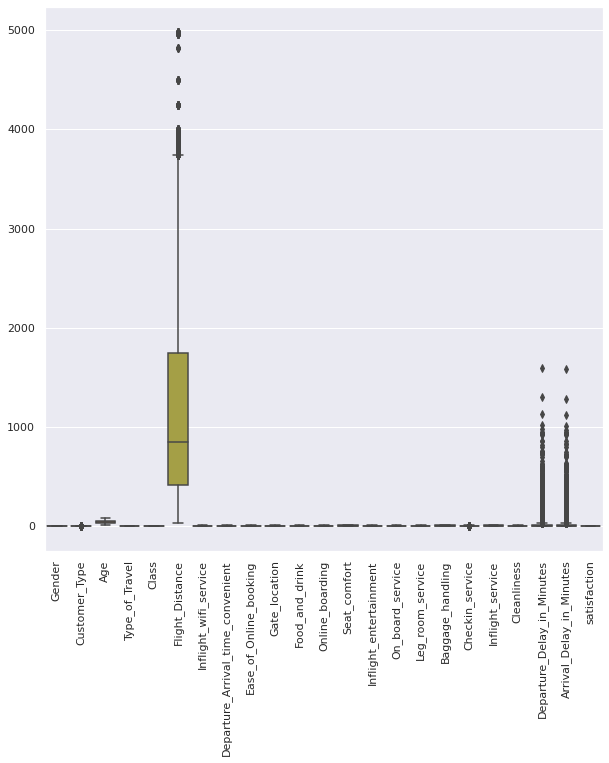

In [ ]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = data,orient = 'v',width=0.8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

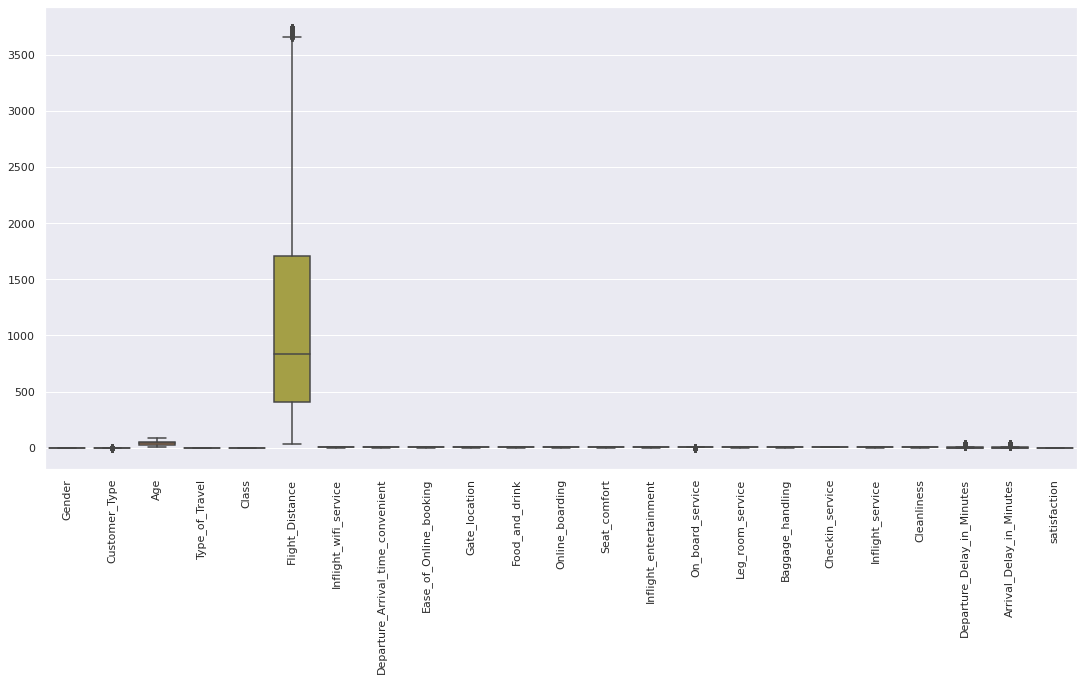

In [ ]:
for x in ['Flight_Distance','Checkin_service','Inflight_service','Departure_Delay_in_Minutes','Gate_location','Arrival_Delay_in_Minutes','Seat_comfort','On_board_service']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan
data.dropna(inplace=True)
plt.rcParams["figure.figsize"] = [18.50, 8.50]
out=sns.boxplot(data=data)
plt.xticks(rotation=90)

#Heatmap

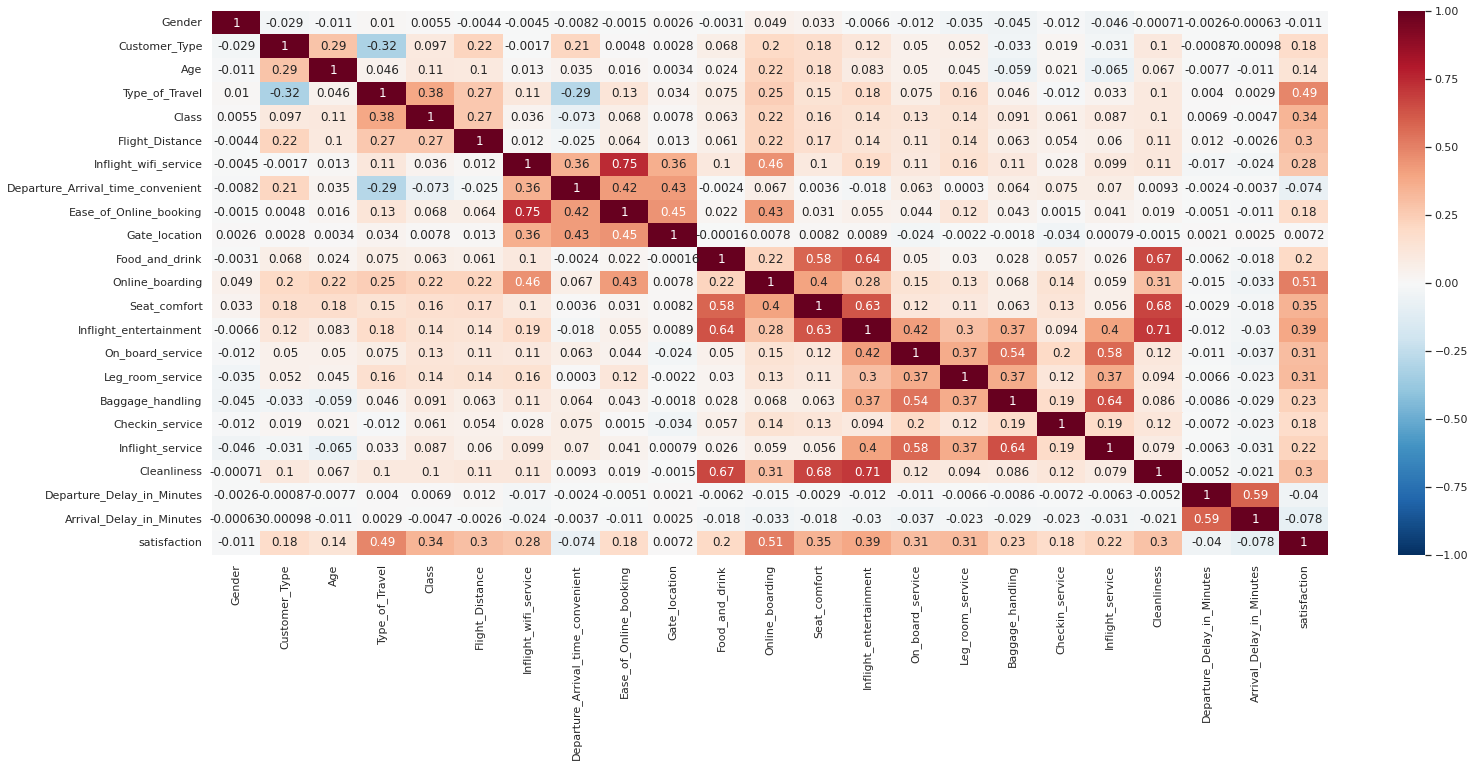

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(25,10))
sns.heatmap(
    data.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

#ML Algorithms

In [ ]:
data.shape

(93648, 23)

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique());

[1 0]
[1 0]
[36 20 44 49 47 46 33 52 50 31 43 55 30 62 24 51 56 53 39 32 40 42 28 60
 58 67 70 66 22 69 35 54 61 21 37 45 59 38  7 34 27 25 26 17 15 41 48 13
 29  8 23 19 65 57 80 64  9 12 68 18 10 14 16 63 73 71 72 11 76 79 78 85
 74 75 77]
[1 0]
[ 0 -1  1]
[2863.  192. 3377. ...  974. 1479.  400.]
[1 2 0 5 3 4]
[1 0 3 2 5 4]
[3 2 0 4 5 1]
[1. 4. 2. 3. 5. 0.]
[5 2 3 4 1 0]
[4 2 1 5 3 0]
[5. 2. 4. 3. 1.]
[4 2 1 5 3 0]
[4. 1. 2. 5. 3. 0.]
[4 1 2 5 3 0]
[4 3 1 2 5]
[3. 2. 4. 5.]
[4. 2. 1. 3. 5. 0.]
[5 2 4 3 1 0]
[ 0.  1. 28. 18. 10.  5.  2.  4. 20. 17.  3.  9.  6. 14. 24.  7. 13. 16.
 27. 29. 25.  8. 11. 26. 12. 19. 15. 21. 23. 22. 30.]
[ 0.          6.         20.         14.          7.          2.
  1.         12.         10.          3.          4.         32.
 24.         27.         17.         11.         13.          8.
 18.         16.         15.         25.          9.         23.
  5.         29.         19.         28.         15.09112884 31.
 21.         22.         30.    

In [ ]:
x= data.drop(["satisfaction"], axis=1)
y=data["satisfaction"]
x.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
1,1,1,36,1,0,2863.0,1,1,3,1.0,...,5.0,4,4.0,4,4,3.0,4.0,5,0.0,0.0
2,0,0,20,1,-1,192.0,2,0,2,4.0,...,2.0,2,4.0,1,3,2.0,2.0,2,0.0,0.0
3,0,1,44,1,0,3377.0,0,0,0,2.0,...,4.0,1,1.0,1,1,3.0,1.0,4,0.0,6.0
4,1,1,49,1,-1,1182.0,2,3,4,3.0,...,2.0,2,2.0,2,2,4.0,2.0,4,0.0,20.0
8,0,1,47,1,-1,556.0,5,2,2,2.0,...,5.0,5,2.0,2,5,3.0,3.0,5,1.0,0.0


In [ ]:
y.head()

1    1
2    0
3    1
4    1
8    1
Name: satisfaction, dtype: int64

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.35, random_state=42)
y_test

23080     1
109731    0
113490    0
28970     1
112279    1
         ..
78768     1
2286      0
84683     0
11        0
66307     0
Name: satisfaction, Length: 32777, dtype: int64

**Logistic regression**

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

0.793361198401318
Precision: 0.756
Recall: 0.825


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model=RandomForestClassifier(n_estimators=100)
c=model.fit(x_train,y_train)
y_pred=c.predict(x_test)
print('Accuracy of model is',metrics.accuracy_score(y_test,y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy of model is 0.959666839552125
Precision: 0.967
Recall: 0.946


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)
y_pred_gini = clf_gini.predict(x_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))
print('Precision: %.3f' % precision_score(y_train, y_pred_train_gini))
print('Recall: %.3f' % recall_score(y_train, y_pred_train_gini))

Model accuracy score with criterion gini index: 0.8932
Training-set accuracy score: 0.8949
Precision: 0.872
Recall: 0.909


**Boosting**

In [ ]:
#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier

adaclf = AdaBoostClassifier(
    n_estimators=1000,
    learning_rate=0.3,
    random_state=42)
l=adaclf.fit(x_train, y_train)
y_pred = adaclf.predict(x_test)
print('Accuracy of model is',metrics.accuracy_score(y_test,y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy of model is 0.9314153217194985
Precision: 0.927
Recall: 0.926


In [ ]:
#gradientBoosting
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE

GradientBoostingClassifier,
Classifier = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=1000,
    learning_rate=0.3,
    random_state=42
)
l=Classifier.fit(x_train, y_train)    
y_pred = Classifier.predict(x_test)
print('Accuracy of model is',metrics.accuracy_score(y_test,y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy of model is 0.954510785001678
Precision: 0.958
Recall: 0.944


In [ ]:
#ExtremeGradientBoosting
from xgboost import XGBClassifier

egb =XGBClassifier(
    n_estimators=1000,
    learning_rate=0.3,
    random_state=42)
l=egb.fit(x_train, y_train)
y_pred = egb.predict(x_test)
print('Accuracy of model is',metrics.accuracy_score(y_test,y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))


Accuracy of model is 0.9566159196997895
Precision: 0.961
Recall: 0.946


**Bagging**

In [ ]:
#bagging
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
base_estimator=BaggingClassifier(),
n_estimators=400,
max_samples=0.5,
bootstrap=True,
oob_score=True,
random_state=42
)
model=bag_model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print('Accuracy of model is',metrics.accuracy_score(y_test,y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy of model is 0.9580193428318639
Precision: 0.964
Recall: 0.946


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
y_pred
print('Accuracy of model is',metrics.accuracy_score(y_test,y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy of model is 0.7497330445129207
Precision: 0.740
Recall: 0.718


**ANN**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(23, activation='relu'),
                            tf.keras.layers.Dense(15, activation='relu'),
                            tf.keras.layers.Dense(9, activation='relu'),
                             tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(3, activation='relu'),
                             tf.keras.layers.Dense(2, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.SGD(lr=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(x_train, y_train, epochs= 200)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
1903/1903 [==============================] - 11s 4ms/step - loss: 0.6611 - accuracy: 0.6232 - precision: 0.6070 - a=recall: 0.5513
Epoch 2/200
1903/1903 [==============================] - 7s 4ms/step - loss: 0.6448 - accuracy: 0.6461 - precision: 0.6737 - a=recall: 0.4717
Epoch 3/200
1903/1903 [==============================] - 7s 4ms/step - loss: 0.6430 - accuracy: 0.6484 - precision: 0.6794 - a=recall: 0.4700
Epoch 4/200
1903/1903 [==============================] - 7s 4ms/step - loss: 0.6448 - accuracy: 0.6472 - precision: 0.6779 - a=recall: 0.4680
Epoch 5/200
1903/1903 [==============================] - 7s 4ms/step - loss: 0.6417 - accuracy: 0.6480 - precision: 0.6768 - a=recall: 0.4736
Epoch 6/200
1903/1903 [==============================] - 7s 4ms/step - loss: 0.6384 - accuracy: 0.6498 - precision: 0.6784 - a=recall: 0.4777
Epoch 7/200
1903/1903 [==============================] - 7s 4ms/step - loss: 0.6373 - accuracy: 0.6497 - precision: 0.6791 - a=recall: 0.4758
Epoch

KeyboardInterrupt: ignored

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
y_pred
k_list = list(range(1,30))
k_values = dict(n_neighbors=k_list)
print(k_values.keys()),
print(k_values.values())
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy')
grid
grid.fit(x,y)
grid.cv_results_
for key in grid.cv_results_.keys():
  print(key) 
grid_table = pd.DataFrame(grid.cv_results_)
grid_table.head()
grid_table_rank = grid_table[['params','mean_test_score','std_test_score','rank_test_score']].loc[grid_table['rank_test_score']==1].sort_values(by='std_test_score', ascending=True)
grid_table_rank
print("The best value of k = {} with {} of accuracy.".format(grid.best_params_,grid.best_score_))
print("The best classifier is: {}".format(grid.best_estimator_))

dict_keys(['n_neighbors'])
dict_values([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])
mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score
The best value of k = {'n_neighbors': 5} with 0.7573040315920873 of accuracy.
The best classifier is: KNeighborsClassifier()


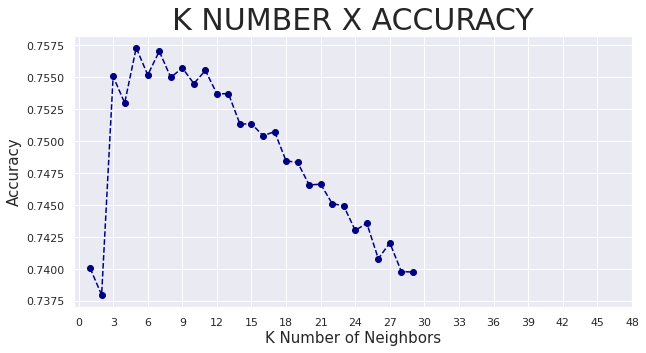

In [ ]:
graphic = grid.cv_results_['mean_test_score']
graphic

plt.figure(figsize=(10,5))
plt.plot(k_list,graphic,color='navy',linestyle='dashed',marker='o')
plt.xlabel('K Number of Neighbors', fontdict={'fontsize': 15})
plt.ylabel('Accuracy', fontdict={'fontsize': 15})
plt.title('K NUMBER X ACCURACY', fontdict={'fontsize': 30})
plt.xticks(range(0,50,3),)
#plt.xaxis.set_major_locator(MultipleLocator(3))
plt.show()

**SVM**

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
svc=svm.SVC(kernel='sigmoid')
model=svc.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
print('Accuracy of model is',metrics.accuracy_score(y_test,y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))

Accuracy of model is 0.4195624980931751
Precision: 0.380
Recall: 0.380
